In [14]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
path = 'CoExBO-main/evaluations/'

#rpart 3 is the one which fliped to validation

In [99]:
def plot_evaluations(dataset = 'ranger', plot_title = 'Ranger 6D', dataset_1=None, dataset_2=None, dataset_3=None, indxs = None):
    # path = 'CoExBO-main/evaluations/final/'
    # with open(path+f'{dataset}.pkl', 'rb') as file:
    #     loaded_object = pickle.load(file)

    # path = 'CoExBO-meta/evaluations/final/meta_'
    # with open(path+f'{dataset}.pkl', 'rb') as file:
    #     loaded_object2 = pickle.load(file)

    # path = 'CoExBO-main/evaluations/'
    # with open(path+f'{dataset}_sv1.pkl', 'rb') as file: #rpart sv1
    #     loaded_object = pickle.load(file)

    # path = 'CoExBO-meta/evaluations/meta_'
    # with open(path+f'{dataset}_v2.pkl', 'rb') as file: #rpart sv2
    #     loaded_object2 = pickle.load(file)
    
    # path = 'CoExBO-meta/evaluations/meta_'
    # with open(path+f'{dataset}_sv4_ei.pkl', 'rb') as file: #rpart sv2
    #     loaded_object3 = pickle.load(file)
    
    
    path = 'CoExBO-main/evaluations/'
    with open(path+dataset_1, 'rb') as file: #rpart sv1
        loaded_object = pickle.load(file)

    path = 'CoExBO-meta/evaluations/meta_'
    with open(path+dataset_2, 'rb') as file: #rpart sv2
        loaded_object2 = pickle.load(file)
    #print("loaded_object2: ", loaded_object2)
    path = 'CoExBO-meta/evaluations/meta_'
    with open(path+dataset_3, 'rb') as file: #rpart sv2
        loaded_object3 = pickle.load(file)
    #loaded_object = loaded_object3
    ranger_evalation = []
    
    for arr in [loaded_object[x] for x in indxs]:
        max_value = 0
        trajectory = []
        for value in arr:
            if value > max_value:
                max_value = value
            trajectory.append(max_value)
        ranger_evalation.append(trajectory)
    #print("loaded_object2: ", loaded_object2)
    benchmark_evaluations = np.vstack(ranger_evalation)
    #print("benchmark_evaluations: ", benchmark_evaluations)
    benchmark_evaluations = np.mean(benchmark_evaluations, axis = 0) 
    
    ranger_evalation = []
    for arr in [loaded_object2[x] for x in indxs]:
        max_value = 0
        trajectory = []
        for value in arr:
            if value > max_value:
                max_value = value
            trajectory.append(max_value)
        ranger_evalation.append(trajectory)
    meta_evaluations = np.vstack(ranger_evalation)
    #print("meta_evaluations: ", meta_evaluations)
    meta_evaluations = np.mean(meta_evaluations, axis = 0) 
    
    ranger_evalation = []
    for arr in [loaded_object2[x] for x in indxs]:
        max_value = 0
        trajectory = []
        for value in arr:
            if value > max_value:
                max_value = value
            trajectory.append(max_value)

        ranger_evalation.append(trajectory)
    
    meta_evaluations = np.vstack(ranger_evalation)
    print("meta_evaluations: ", ranger_evalation)
    meta_evaluations = np.mean(meta_evaluations, axis = 0) 
    meta_evaluations = np.hstack([benchmark_evaluations[0],meta_evaluations])

    ranger_evalation = []
    for arr in [loaded_object3[x] for x in indxs]:
        max_value = 0
        trajectory = []
        for value in arr:
            if value > max_value:
                max_value = value
            trajectory.append(max_value)
        ranger_evalation.append(trajectory)
    
    meta_evaluations_ei = np.vstack(ranger_evalation)
    #print("meta_evaluations_ei: ", meta_evaluations_ei)
    meta_evaluations_ei = np.mean(meta_evaluations_ei, axis = 0) 
    
    # plt.plot(meta_evaluations, label='Meta')
    # plt.plot(benchmark_evaluations, label='Benchmark_GP')
    # plt.title(plot_title)
    # plt.legend()
    window_size = 1  # Adjust the window size as needed
    meta_ei_smoothed = np.convolve(meta_evaluations_ei, np.ones(window_size)/window_size, mode='valid')
    meta_smoothed = np.convolve(meta_evaluations, np.ones(window_size)/window_size, mode='valid')
    benchmark_smoothed = np.convolve(benchmark_evaluations, np.ones(window_size)/window_size, mode='valid')

    # Calculate standard deviation of the smoothed data
    meta_std = np.std(meta_smoothed)
    meta_ei_std = np.std(meta_ei_smoothed)
    benchmark_std = np.std(benchmark_smoothed)

    # Plot the smoothed data
    plt.plot(meta_smoothed, label='Meta')
    plt.plot(benchmark_smoothed, label='Baseline')
    plt.plot(meta_ei_smoothed, label='Meta EI')

    # # Plot the standard deviation as shaded regions
    # plt.fill_between(range(len(meta_smoothed)), meta_smoothed - meta_std, meta_smoothed + meta_std, alpha=0.2)
    # plt.fill_between(range(len(benchmark_smoothed)), benchmark_smoothed - benchmark_std, benchmark_smoothed + benchmark_std, alpha=0.2)

    plt.title(plot_title)
    plt.legend()
    plt.show()

In [112]:
def plot_evaluations_pref(dataset = 'ranger', plot_title = 'Ranger 6D', dataset_1=None, dataset_2=None, dataset_3=None, indxs = None):

    
    path = 'CoExBO-main/evaluations/'
    with open(path+dataset_1, 'rb') as file: #rpart sv1
        loaded_object = pickle.load(file)

    path = 'CoExBO-meta/evaluations/meta_'
    with open(path+dataset_2, 'rb') as file: #rpart sv2
        loaded_object2 = pickle.load(file)
    #print("loaded_object2: ", loaded_object2)
    path = 'CoExBO-meta/evaluations/meta_'
    with open(path+dataset_3, 'rb') as file: #rpart sv2
        loaded_object3 = pickle.load(file)
    #loaded_object = loaded_object3
    ranger_evalation = []
    
    for arr in [loaded_object[x] for x in indxs]:
        max_value = 0
        trajectory = []
        for value in arr:
            if value > max_value:
                max_value = value
            trajectory.append(max_value)
        ranger_evalation.append(trajectory)
    #print("loaded_object2: ", loaded_object2)
    benchmark_evaluations = np.vstack(ranger_evalation)
    #print("benchmark_evaluations: ", benchmark_evaluations)
    benchmark_evaluations = np.mean(benchmark_evaluations, axis = 0) 
    
    ranger_evalation = []
    for arr in [loaded_object2[x] for x in indxs]:
        max_value = 0
        trajectory = []
        for value in arr:
            if value > max_value:
                max_value = value
            trajectory.append(max_value)

        ranger_evalation.append(trajectory)
    
    meta_evaluations = np.vstack(ranger_evalation)
    meta_evaluations = np.mean(meta_evaluations, axis = 0) 
    meta_evaluations = np.hstack([benchmark_evaluations[0],meta_evaluations])

    
    ranger_evalation = []
    for arr in [loaded_object3[x] for x in indxs]:
        max_value = 0
        trajectory = []
        for value in arr:
            if value > max_value:
                max_value = value
            trajectory.append(max_value)
        ranger_evalation.append(trajectory)
    
    meta_evaluations_ei = np.vstack(ranger_evalation)
    print("meta_evaluations_ei: ", ranger_evalation)
    meta_evaluations_ei = np.mean(meta_evaluations_ei, axis = 0) 
    meta_evaluations_ei = np.hstack([benchmark_evaluations[0],meta_evaluations_ei])
    # plt.plot(meta_evaluations, label='Meta')
    # plt.plot(benchmark_evaluations, label='Benchmark_GP')
    # plt.title(plot_title)
    # plt.legend()
    window_size = 2  # Adjust the window size as needed
    meta_ei_smoothed = np.convolve(meta_evaluations_ei, np.ones(window_size)/window_size, mode='valid')
    meta_smoothed = np.convolve(meta_evaluations, np.ones(window_size)/window_size, mode='valid')
    benchmark_smoothed = np.convolve(benchmark_evaluations, np.ones(window_size)/window_size, mode='valid')

    # Calculate standard deviation of the smoothed data
    meta_std = np.std(meta_smoothed)
    meta_ei_std = np.std(meta_ei_smoothed)
    benchmark_std = np.std(benchmark_smoothed)

    # Plot the smoothed data
    plt.plot(meta_smoothed, label='Meta+Pref')
    plt.plot(benchmark_smoothed, label='Baseline')
    plt.plot(meta_ei_smoothed, label='Meta')

    # # Plot the standard deviation as shaded regions
    # plt.fill_between(range(len(meta_smoothed)), meta_smoothed - meta_std, meta_smoothed + meta_std, alpha=0.2)
    # plt.fill_between(range(len(benchmark_smoothed)), benchmark_smoothed - benchmark_std, benchmark_smoothed + benchmark_std, alpha=0.2)

    plt.title(plot_title)
    plt.legend()
    plt.show()

meta_evaluations_ei:  [[0.48196300864219666, 0.6217024326324463, 0.6217024326324463, 0.6217024326324463, 0.6217024326324463, 0.6217024326324463, 0.6217024326324463, 0.6217024326324463, 0.6217024326324463, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731323, 0.6378592252731

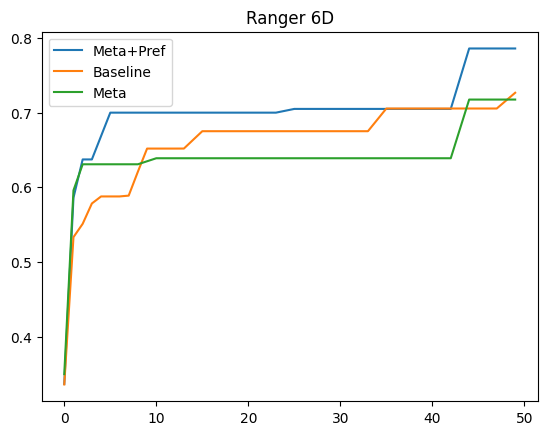

In [107]:
indexs_plot = [0,1]
dataset = 'ranger'
plot_evaluations_pref(dataset='ranger', plot_title='Ranger 6D', dataset_1 = f'{dataset}_sv2.pkl', dataset_2 = f'{dataset}_sv3_Y0.pkl', dataset_3 = f'{dataset}_sv3_Y1.pkl', indxs= indexs_plot)
#with open(path+f'{dataset}_sv1.pkl', 'rb') as file:
#with open(path+f'{dataset}_v2.pkl', 'rb') as file:
#_sv2_ei.pkl

In [113]:
dataset = 'rpart'
indexs_plot = [0,1,2,3,4,5]
plot_evaluations_pref(dataset='rpart', plot_title='Rpart 6D', dataset_1 = f'{dataset}_sv1.pkl', dataset_2 = f'{dataset}_sv1_Y0.pkl', dataset_3 = f'{dataset}_sv1_Y1.pkl', indxs= indexs_plot)

meta_evaluations_ei:  [[tensor([0.0512]), tensor([0.4967]), tensor([0.4967]), tensor([0.4967]), tensor([0.8733]), tensor([0.8733]), tensor([0.8733]), tensor([0.8733]), tensor([0.8733]), tensor([0.8733]), tensor([0.8733]), tensor([0.8733]), tensor([0.8733]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983]), tensor([0.9983])], [tensor([0.4623]), tensor([0.4780]), tensor([0.4780]), tensor([0.4780]), te

TypeError: loop of ufunc does not support argument 0 of type Tensor which has no callable conjugate method

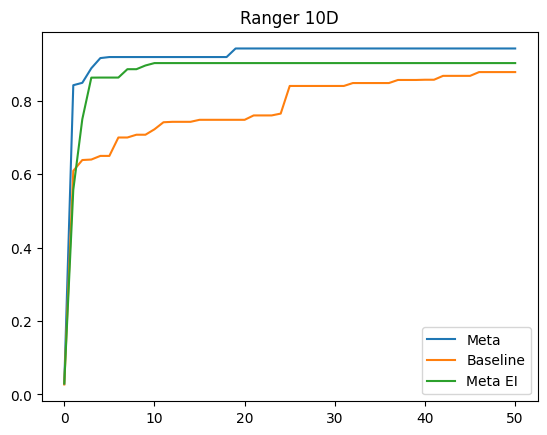

In [16]:

#plot_evaluations(dataset='ranger9', plot_title='Ranger 9D') #ranger9 v2 better 
indexs_plot = [0,1,2,3,4,5,6]
dataset = 'ranger9'
plot_evaluations(dataset='ranger9', plot_title='Ranger 10D', dataset_1 = f'{dataset}_sv3.pkl', dataset_2 = f'{dataset}_sv6.pkl', dataset_3 = f'{dataset}_sv6_ei.pkl', indxs= indexs_plot)

meta_evaluations:  [[0.44435104727745056, 0.6493679285049438, 0.6493679285049438, 0.6493679285049438, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456, 0.7745903730392456

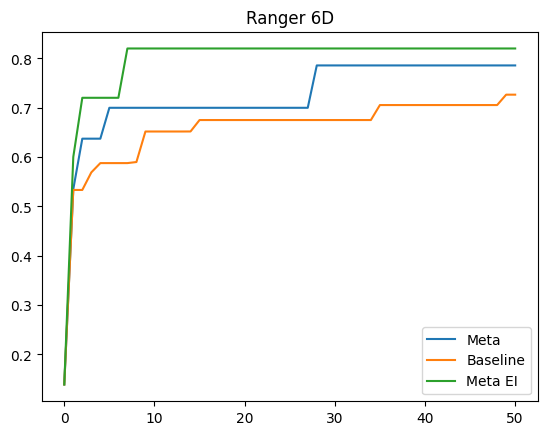

In [97]:
indexs_plot = [0,1]
dataset = 'ranger'
plot_evaluations(dataset='ranger', plot_title='Ranger 6D', dataset_1 = f'{dataset}_sv2.pkl', dataset_2 = f'{dataset}_sv2_Y0.pkl', dataset_3 = f'{dataset}_sv8_ei.pkl', indxs= indexs_plot)

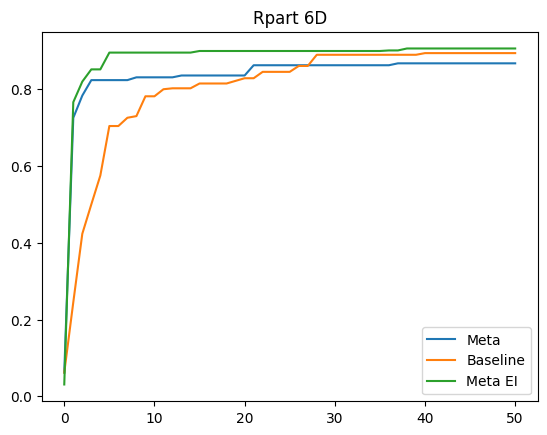

In [61]:
dataset = 'rpart'
indexs_plot = [0,1,2,3,4,5]
#plot_evaluations(dataset='rpart', plot_title='Rpart 6D', dataset_1 = f'{dataset}_sv1.pkl', dataset_2 = f'{dataset}_v2.pkl', dataset_3 = f'{dataset}_sv6_na.pkl', indxs= indexs_plot)
plot_evaluations(dataset='rpart', plot_title='Rpart 6D', dataset_1 = f'{dataset}_sv1.pkl', dataset_2 = f'{dataset}_v2.pkl', dataset_3 = f'{dataset}_sv7_ei.pkl', indxs= indexs_plot)
#with open(path+f'{dataset}_sv1.pkl', 'rb') as file:
#with open(path+f'{dataset}_v2.pkl', 'rb') as file:
#_sv2_ei.pkl


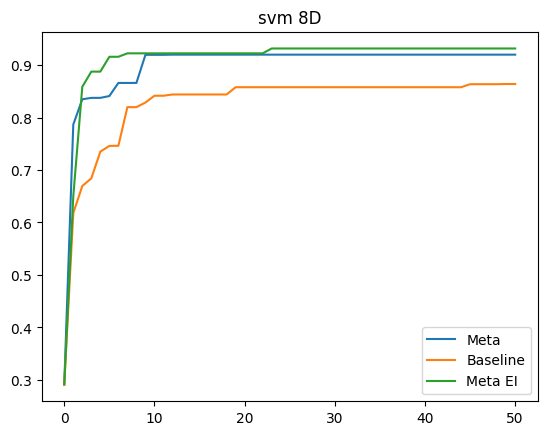

In [19]:
indexs_plot = [0,1,2,3,4,5]
dataset = 'svm'
plot_evaluations(dataset='svm', plot_title='svm 8D', dataset_1 = f'{dataset}_sv6.pkl', dataset_2 = f'{dataset}_sv6.pkl', dataset_3 = f'{dataset}_sv6_ei.pkl', indxs= indexs_plot)
#with open(path+f'{dataset}_v2.pkl', 'rb') as file:
#_sv2_ei.pkl

meta_evaluations:  [[0.00064677, 0.62317705, 0.64152956, 0.64152956, 0.64152956, 0.76475954, 0.78194857, 0.78194857, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889, 0.8376889], [0.058042884, 0.7623565, 0.7623565, 0.7623565, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984, 0.7634984,

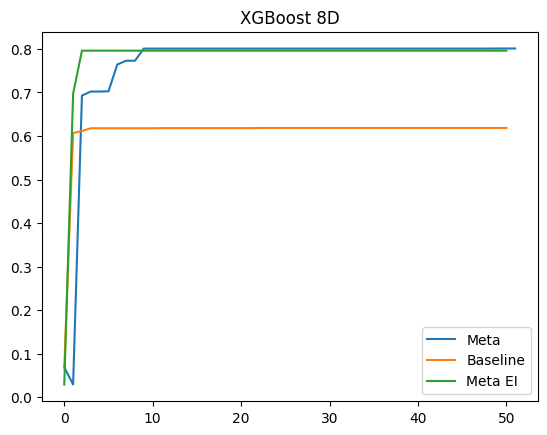

In [102]:
indexs_plot = [0,1]
dataset = 'xgboost'
plot_evaluations(dataset='xgboost', plot_title='XGBoost 8D', dataset_1 = f'{dataset}_sv6.pkl', dataset_2 = f'{dataset}_sv6.pkl', dataset_3 = f'{dataset}_sv7_ei.pkl', indxs= indexs_plot)
#plot_evaluations(dataset='xgboost', plot_title='XGBoost 8D', dataset_1 = f'{dataset}_sv6.pkl', dataset_2 = f'{dataset}_sv6.pkl', dataset_3 = f'{dataset}_sv6_na.pkl', indxs= indexs_plot)
#with open(path+f'{dataset}_sv1.pkl', 'rb') as file:
#with open(path+f'{dataset}_v2.pkl', 'rb') as file:
#_sv2_ei.pkl

meta_evaluations:  [[0, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172, 0.8999172], [0.14775139, 0.46233064, 0.78405625, 0.78405625, 0.78405625, 0.78405625, 0.78405625, 0.78405625, 0.78405625, 0.78405625, 0.78405625, 0.78405625, 0.78405625, 0.78405625, 0.78405625, 0.809089, 0.809089, 0.809089, 0.809089, 0.809089, 0.809089, 0.809089, 0.809089, 0.809089, 0.809089, 0.809089, 0.809089, 0.809089, 0.809089, 0.809089, 0.809089, 0.809089, 0.809089, 0.809089, 0.809089, 0.809089, 0.809089, 0.809089, 0.83979875, 0.

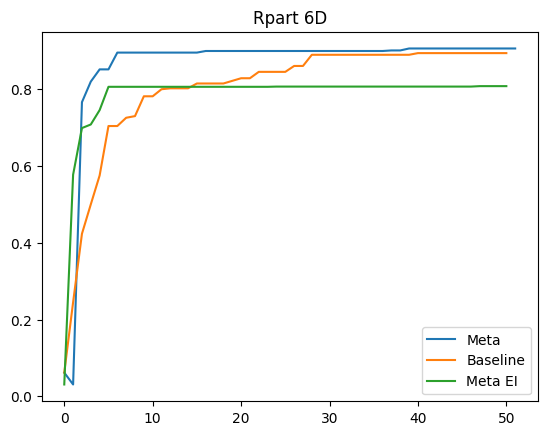

In [101]:
dataset = 'rpart'
indexs_plot = [0,1,2,3,4,5]
plot_evaluations(dataset='rpart', plot_title='Rpart 6D', dataset_1 = f'{dataset}_sv1.pkl', dataset_2 = f'{dataset}_sv7_ei.pkl', dataset_3 = f'{dataset}_sv6_na.pkl', indxs= indexs_plot)
#plot_evaluations(dataset='rpart', plot_title='Rpart 6D', dataset_1 = f'{dataset}_sv1.pkl', dataset_2 = f'{dataset}_v2.pkl', dataset_3 = f'{dataset}_sv7_ei.pkl', indxs= indexs_plot)
#with open(path+f'{dataset}_sv1.pkl', 'rb') as file:
#with open(path+f'{dataset}_v2.pkl', 'rb') as file:
#_sv2_ei.pkl


meta_evaluations:  [[0.00064677, 0.62317705, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942, 0.8211942], [0.058042884, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.7704472, 0.770

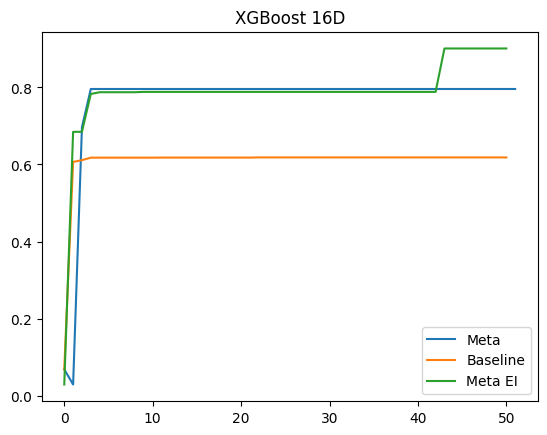

In [106]:
indexs_plot = [0,1]
dataset = 'xgboost'
#plot_evaluations(dataset='xgboost', plot_title='XGBoost 8D', dataset_1 = f'{dataset}_sv6.pkl', dataset_2 = f'{dataset}_sv6.pkl', dataset_3 = f'{dataset}_sv7_ei.pkl', indxs= indexs_plot)
plot_evaluations(dataset='xgboost', plot_title='XGBoost 16D', dataset_1 = f'{dataset}_sv6.pkl', dataset_2 = f'{dataset}_sv7_ei.pkl', dataset_3 = f'{dataset}_sv6_na.pkl', indxs= indexs_plot)
